In [1]:
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
with open('../data/labels.txt', "r") as content:
    labels_map = ast.literal_eval(content.read())
    labels_map = {v: k for k, v in labels_map.items()}

In [3]:
labels_map

{0: 'Atelectasis',
 1: 'Cardiomegaly',
 2: 'Effusion',
 3: 'Infiltrate',
 4: 'Mass',
 5: 'Nodule',
 6: 'Pneumonia',
 7: 'Pneumothorax'}

In [4]:
predictions = pd.read_csv('../data/predictions.csv')
predictions.labels = predictions.labels.astype(object)
predictions.fillna('', inplace=True)
predictions['num_bboxes'] = predictions.predictions.apply(lambda x: len(x.split(";")) - 1)

In [5]:
predictions = predictions[predictions['num_bboxes'] > 0]

In [6]:
predictions.sample(10)

,image_id,predictions,labels,num_bboxes
46683,00013616_043.png,0.6973 167 267 269 392; 0.5108 600 395 228 373...,"6,3,3",3
97795,00022255_002.png,0.8320 222 389 563 382;,1,1
50941,00021426_001.png,0.5781 258 490 443 390;,1,1
16758,00009608_038.png,0.7204 104 248 616 503; 0.5728 262 446 436 365...,"3,1,2",3
60586,00018942_001.png,0.5031 219 276 245 278;,3,1
11310,00016789_015.png,0.5497 329 362 475 356;,1,1
43826,00018237_021.png,0.5277 433 444 493 316;,1,1
81273,00028499_007.png,0.7109 141 202 231 691; 0.5609 179 347 589 427;,"2,3",2
95020,00018562_005.png,0.6069 226 548 129 115;,5,1
69652,00012864_000.png,0.6760 199 756 153 154;,4,1


In [7]:
def plot_image_bboxes(image, bboxes, labels):
    box_color = (220, 0, 0)  
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    for box, label in zip(bboxes, labels):
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        x1, x2 = min(x1, x2), max(x1, x2)
        y1, y2 = min(y1, y2), max(y1, y2)        

        cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 3)
        cv2.putText(image,
                    labels_map[label],
                    (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,  # font face
                    1.2,                       # font scale
                    box_color,                 # text color
                    thickness = 2)

    ax.set_axis_off()
    ax.imshow(image)

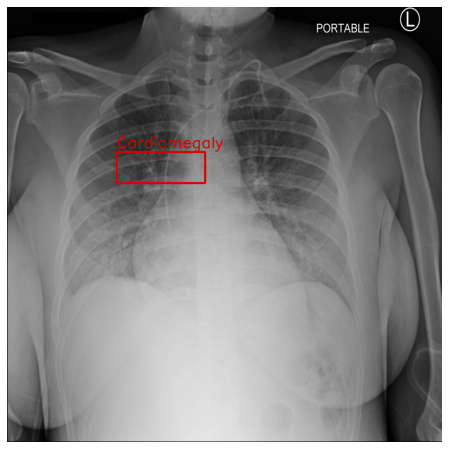

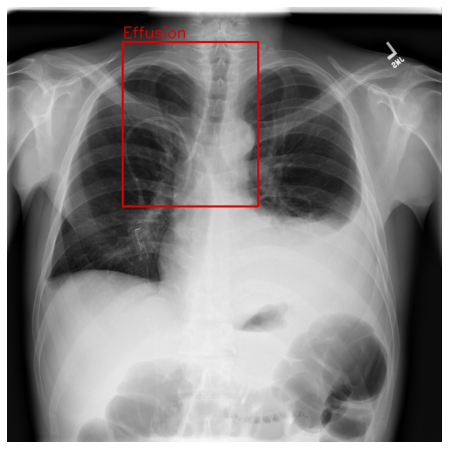

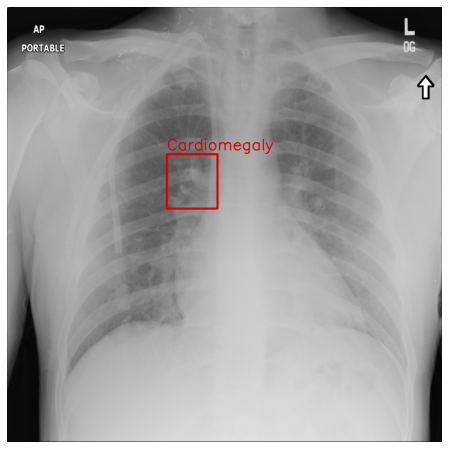

In [8]:
IMAGES_TO_SHOW = 3
random_state = 92

predictions_subset = predictions.sample(IMAGES_TO_SHOW, random_state=random_state)
for prediction in predictions_subset.itertuples():
    image_id = prediction.image_id
    bboxes_str = prediction.predictions
    labels_str = prediction.labels
    
    image = cv2.imread(f'../data/images/{image_id}', cv2.IMREAD_COLOR)
    
    bbox_list = bboxes_str.split(';')
    bbox_list = [bbox_str.strip().split(' ') for bbox_str in bbox_list]
    bbox_list = [bbox_item for bbox_item in bbox_list if len(bbox_item) == 5]
    bbox_list = [(bbox_str[1], bbox_str[2], bbox_str[3], bbox_str[4])
                 for bbox_str in bbox_list]
    
    labels = [int(x) for x in labels_str.split(',')]

    plot_image_bboxes(image, bbox_list, labels)
    plt.show()